# XGBoost

* 트리 기반의 앙상블 기법
* 분류에 있어서 다른 알고리즘보다 좋은 예측 성능을 보여줌
* XGBoost는 GBM 기반이지만, GBM의 단점인 느린 수행 시간과 과적합 규제 부재 등의 문제를 해결
* 병렬 CPU 환경에서 빠르게 학습 가능

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import xgboost as xgb

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size=0.2, random_state=123)
dtrain = xgb.DMatrix(data=X_train, label=y_train, feature_names=cancer.feature_names)
dtest = xgb.DMatrix(data=X_test, label=y_test, feature_names=cancer.feature_names)

In [5]:
params = {
    'max_depth':3,
    'eta':0.1,
    'objective':'binary:logistic',
    'eval_metric':'logloss',
    'early_stopping':100
}
num_rounds = 400

In [6]:
evals = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds,
                      early_stopping_rounds=100, evals=evals)

[14:58:54] WARNING: ../src/learner.cc:767: 
Parameters: { "early_stopping" } are not used.

[0]	train-logloss:0.60944	eval-logloss:0.61010
[1]	train-logloss:0.54047	eval-logloss:0.54074
[2]	train-logloss:0.48211	eval-logloss:0.48490
[3]	train-logloss:0.43365	eval-logloss:0.43922
[4]	train-logloss:0.39072	eval-logloss:0.39791
[5]	train-logloss:0.35372	eval-logloss:0.36211
[6]	train-logloss:0.32223	eval-logloss:0.32996
[7]	train-logloss:0.29292	eval-logloss:0.30179
[8]	train-logloss:0.26731	eval-logloss:0.27801
[9]	train-logloss:0.24409	eval-logloss:0.25775
[10]	train-logloss:0.22517	eval-logloss:0.24037
[11]	train-logloss:0.20807	eval-logloss:0.22271
[12]	train-logloss:0.19177	eval-logloss:0.20795
[13]	train-logloss:0.17746	eval-logloss:0.19531
[14]	train-logloss:0.16408	eval-logloss:0.18460
[15]	train-logloss:0.15250	eval-logloss:0.17183
[16]	train-logloss:0.14198	eval-logloss:0.16152
[17]	train-logloss:0.13270	eval-logloss:0.15443
[18]	train-logloss:0.12326	eval-logloss:0.14913
[19]	t

In [7]:
import numpy as np

predicts = xgb_model.predict(dtest)
print(np.round(predicts[:10], 3))

[1.    0.999 0.001 0.995 0.001 0.989 0.995 0.998 0.966 0.795]


In [8]:
preds = [ 1 if x > 0.5 else 0 for x in predicts ]
print(preds[:10])

[1, 1, 0, 1, 0, 1, 1, 1, 1, 1]


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("정확도: {}".format(accuracy_score(y_test, preds)))
print("정밀도: {}".format(precision_score(y_test, preds)))
print("재현율: {}".format(recall_score(y_test, preds)))

정확도: 0.9736842105263158
정밀도: 0.972972972972973
재현율: 0.9863013698630136


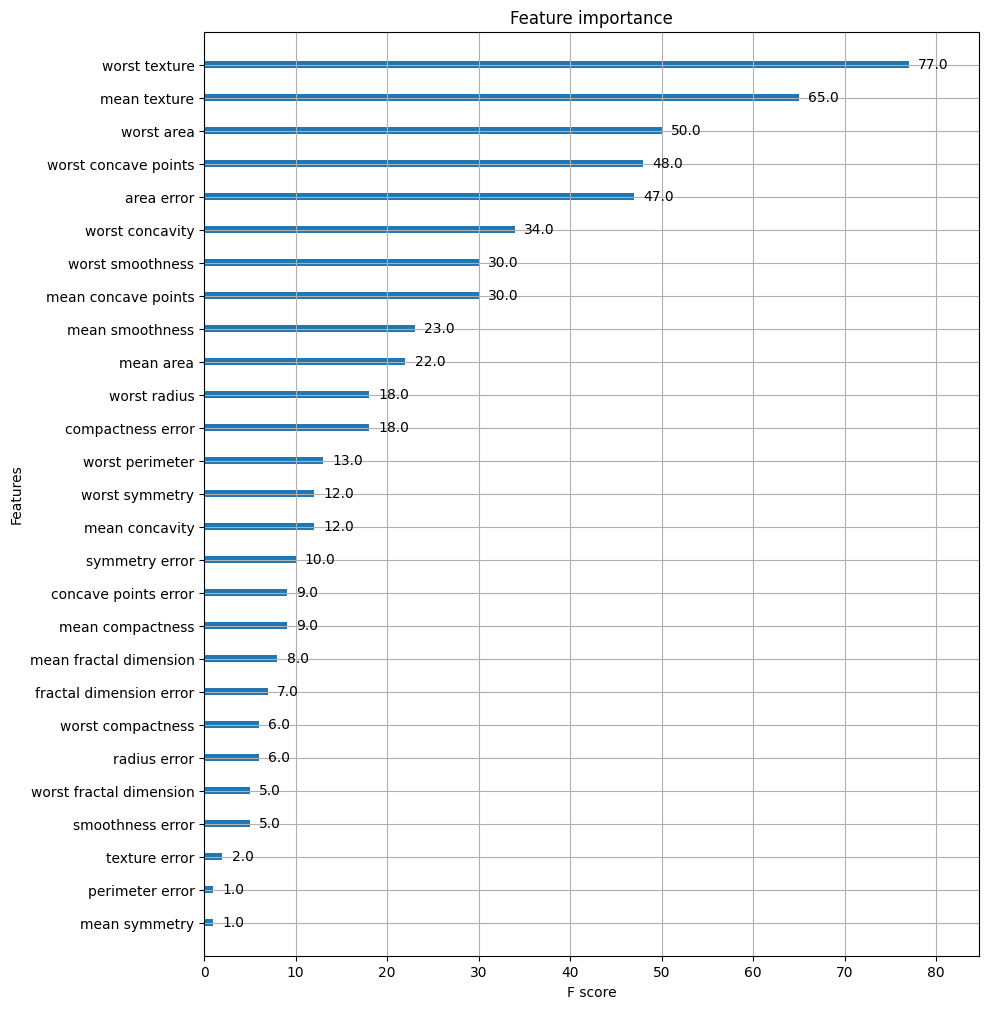

In [10]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax);

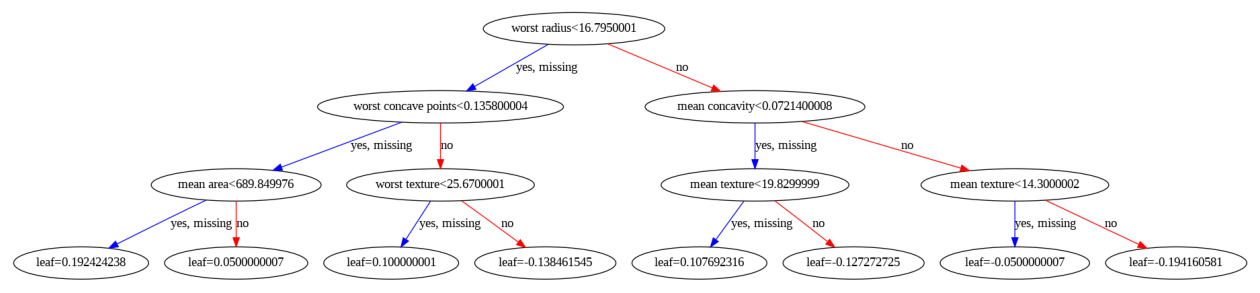

In [11]:
from xgboost import plot_tree

fig, ax = plt.subplots(figsize=(16, 16))
plot_tree(xgb_model, ax=ax);

## XGBClassifier

### 붓꽃 데이터

In [12]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    test_size=0.2, random_state=123)

In [14]:
from xgboost import XGBClassifier

xgbc = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgbc.fit(X_train, y_train)
preds = xgbc.predict(X_test)
preds_proba = xgbc.predict_proba(X_test)[:, 1]

In [15]:
from sklearn.model_selection import cross_validate

cross_val = cross_validate(
    estimator=xgbc,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(),
                                         cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(),
                                           cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(),
                                           cross_val['test_score'].std()))

avg fit time: 0.19540328979492189 (+/- 0.056540723745730555)
avg score time: 0.003437328338623047 (+/- 0.0007559470990664858)
avg test score: 0.96 (+/- 0.024944382578492935)


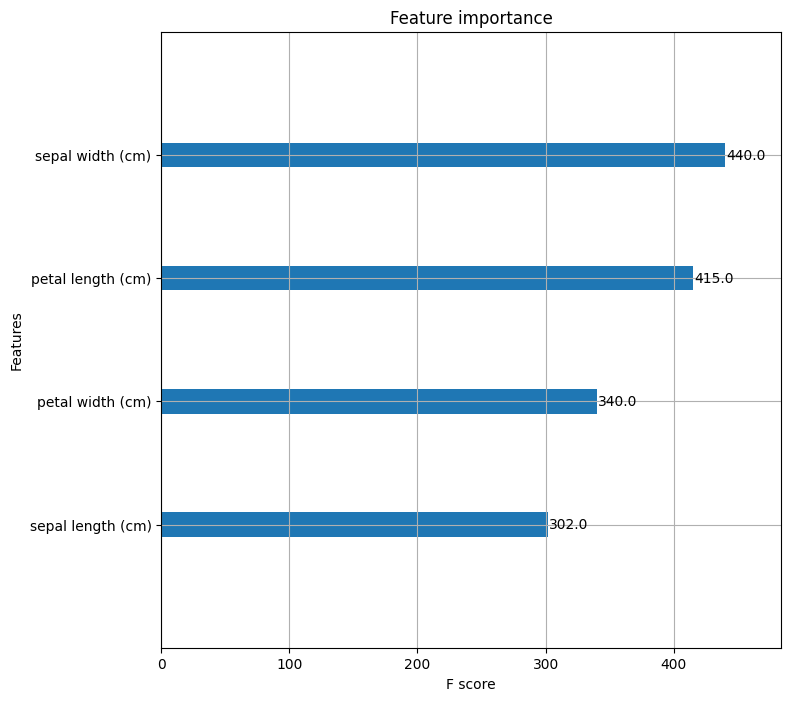

In [17]:
fig, ax = plt.subplots(figsize=(8, 8))
xgbc.get_booster().feature_names = iris.feature_names
plot_importance(xgbc.get_booster(), ax=ax);

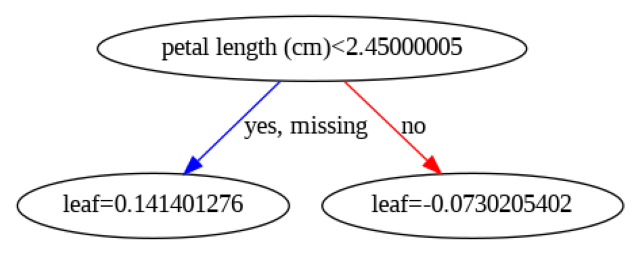

In [18]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_tree(xgbc, ax=ax);

### 와인 데이터

In [19]:
from sklearn.datasets import load_wine

wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=123)

In [20]:
xgbc = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgbc.fit(X_train, y_train)
preds = xgbc.predict(X_test)
preds_proba = xgbc.predict_proba(X_test)[:, 1]

In [21]:
cross_val = cross_validate(
    estimator=xgbc,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.2627577304840088 (+/- 0.1888788086893184)
avg score time: 0.003978109359741211 (+/- 0.0012579518928473425)
avg test score: 0.9609523809523809 (+/- 0.028267341226138717)


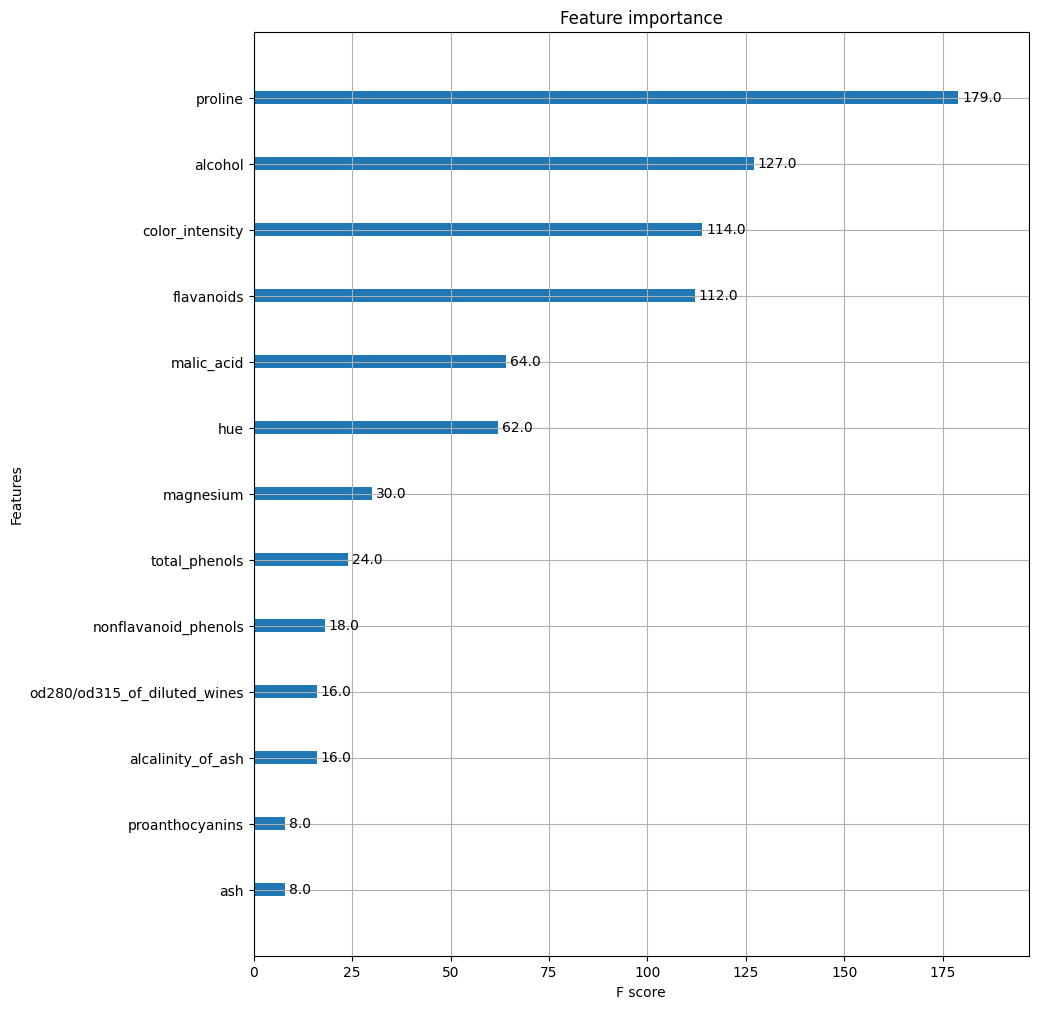

In [22]:
fig, ax = plt.subplots(figsize=(10, 12))
xgbc.get_booster().feature_names = wine.feature_names
plot_importance(xgbc, ax=ax);

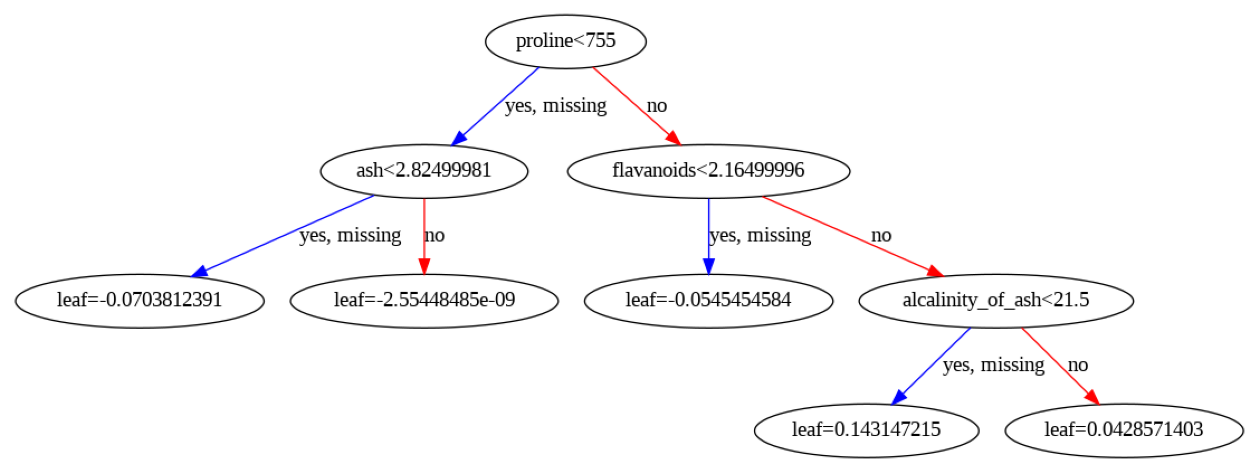

In [23]:
fig, ax = plt.subplots(figsize=(16, 16))
plot_tree(xgbc, ax=ax);

### 유방암 데이터

In [24]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size=0.2, random_state=123)

In [25]:
xgbc = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgbc.fit(X_train, y_train)
preds = xgbc.predict(X_test)
preds_proba = xgbc.predict_proba(X_test)[:, 1]

In [26]:
cross_val = cross_validate(
    estimator=xgbc,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.28947768211364744 (+/- 0.012913737409524442)
avg score time: 0.003238821029663086 (+/- 0.00012719908043620166)
avg test score: 0.9736376339077782 (+/- 0.009609619188189153)


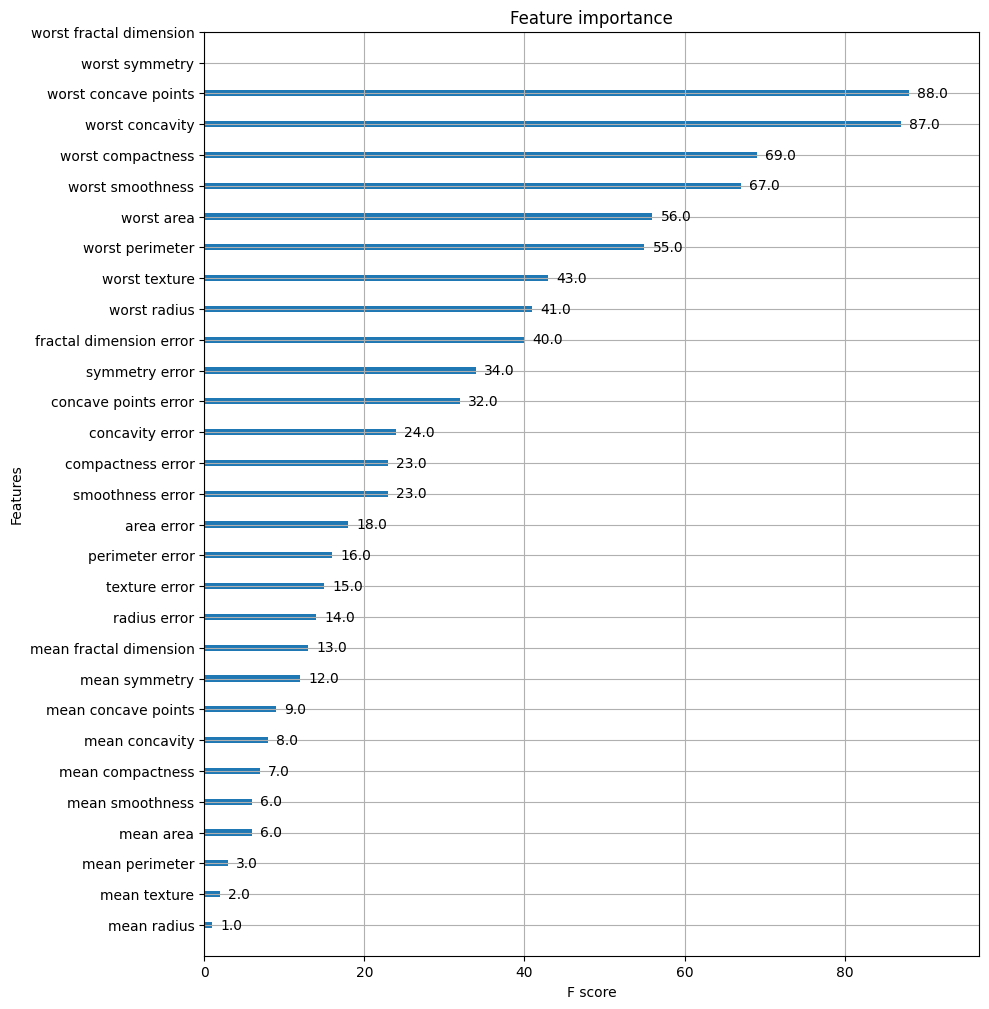

In [36]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgbc, ax=ax)
plt.yticks(range(30), cancer.feature_names);

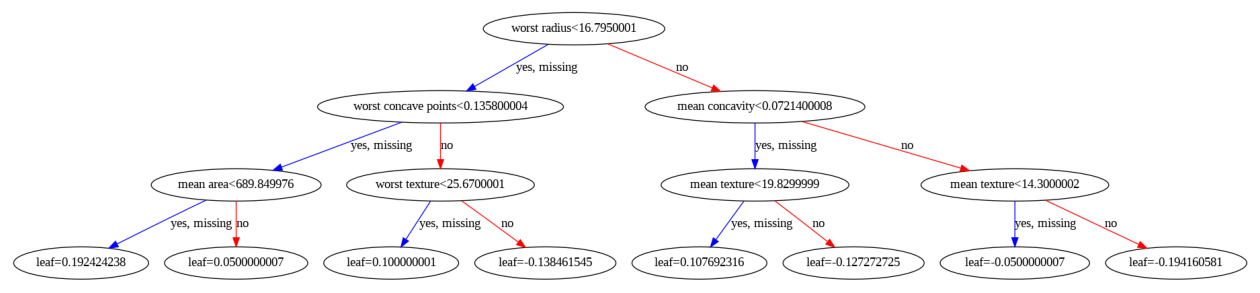

In [37]:
fig, ax = plt.subplots(figsize=(16, 16))
plot_tree(xgb_model, ax=ax);

## XGBRegressor

### 보스턴 데이터

In [38]:
import numpy as np
import pandas as pd

boston = pd.read_csv(filepath_or_buffer="http://lib.stat.cmu.edu/datasets/boston",
                     delim_whitespace=True,
                     skiprows=21,
                     header=None)

columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
           'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# 모든 값을 하나의 긴 리스트로 flatten 한 후에 null 제거
values_w_nulls = boston.values.flatten()
all_values = values_w_nulls[~np.isnan(values_w_nulls)]

# 14개의 열이 되도록 값의 모양을 바꾸고 데이터프레임으로 새롭게 구성
boston_df = pd.DataFrame(data = all_values.reshape(-1, len(columns)),
                         columns = columns)

boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [39]:
boston_columns = boston_df.drop('MEDV', axis=1).columns
boston_X = boston_df.drop('MEDV', axis=1).to_numpy()
boston_y = boston_df['MEDV'].to_numpy()

In [40]:
X_train, X_test, y_train, y_test = train_test_split(boston_X, boston_y,
                                                    test_size=0.2, random_state=123)

In [41]:
from xgboost import XGBRegressor

xgbr = XGBRegressor(n_estimators=400, learning_rate=0.1, max_depth=3, objective ='reg:squarederror')
xgbr.fit(X_train, y_train)
preds = xgbr.predict(X_test)

In [42]:
cross_val = cross_validate(
    estimator=xgbr,
    X=boston_X, y=boston_y,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.4558831214904785 (+/- 0.3070501474900634)
avg score time: 0.0033208370208740235 (+/- 0.0009763898012261895)
avg test score: 0.6884390736705599 (+/- 0.1649974770303876)


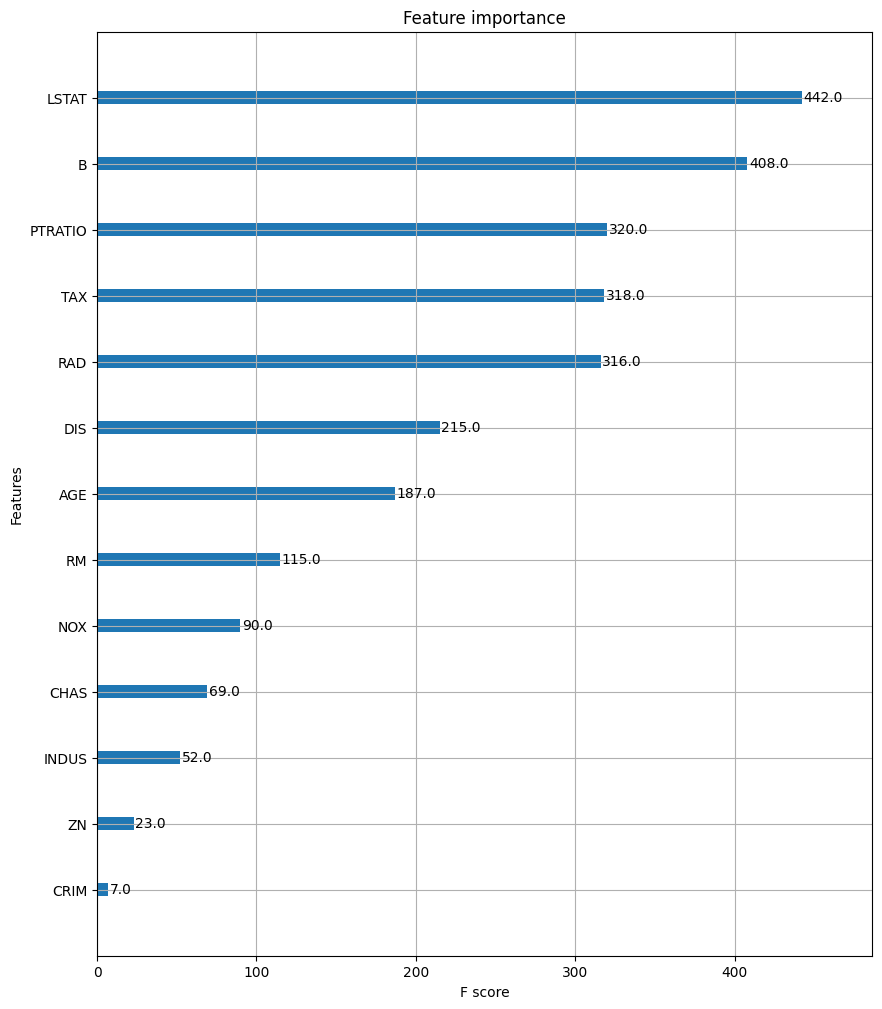

In [45]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgbr, ax=ax);
plt.yticks(range(13), boston_columns);

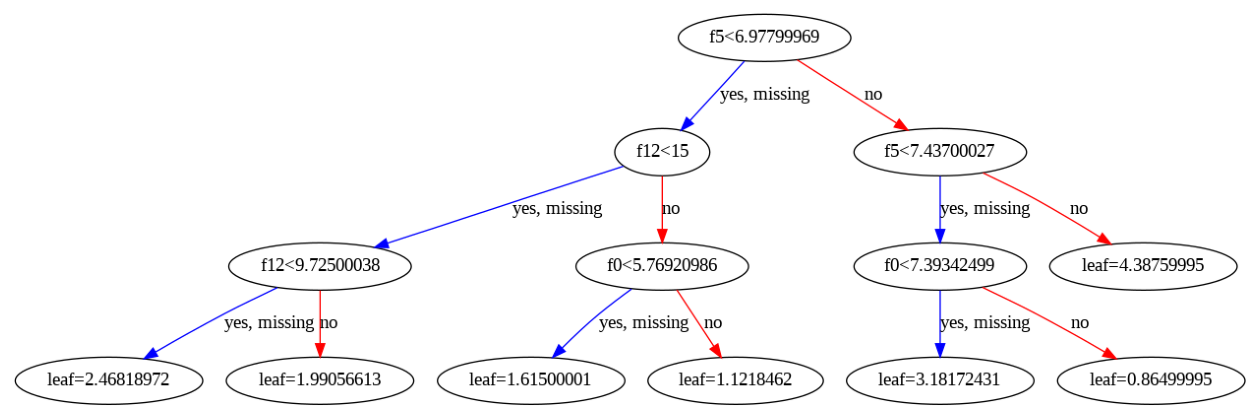

In [51]:
fig, ax = plt.subplots(figsize=(16, 16))
plot_tree(xgbr, ax=ax);

### 당뇨병 데이터

In [52]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=123)

In [53]:
xgbr = XGBRegressor(n_estimators=400, learning_rate=0.1, max_depth=3, objective ='reg:squarederror')
xgbr.fit(X_train, y_train)
preds = xgbr.predict(X_test)

In [54]:
cross_val = cross_validate(
    estimator=xgbr,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.17379441261291503 (+/- 0.01900375573811382)
avg score time: 0.0028717041015625 (+/- 0.00028154576940905813)
avg test score: 0.2998837790950602 (+/- 0.07527155614299372)


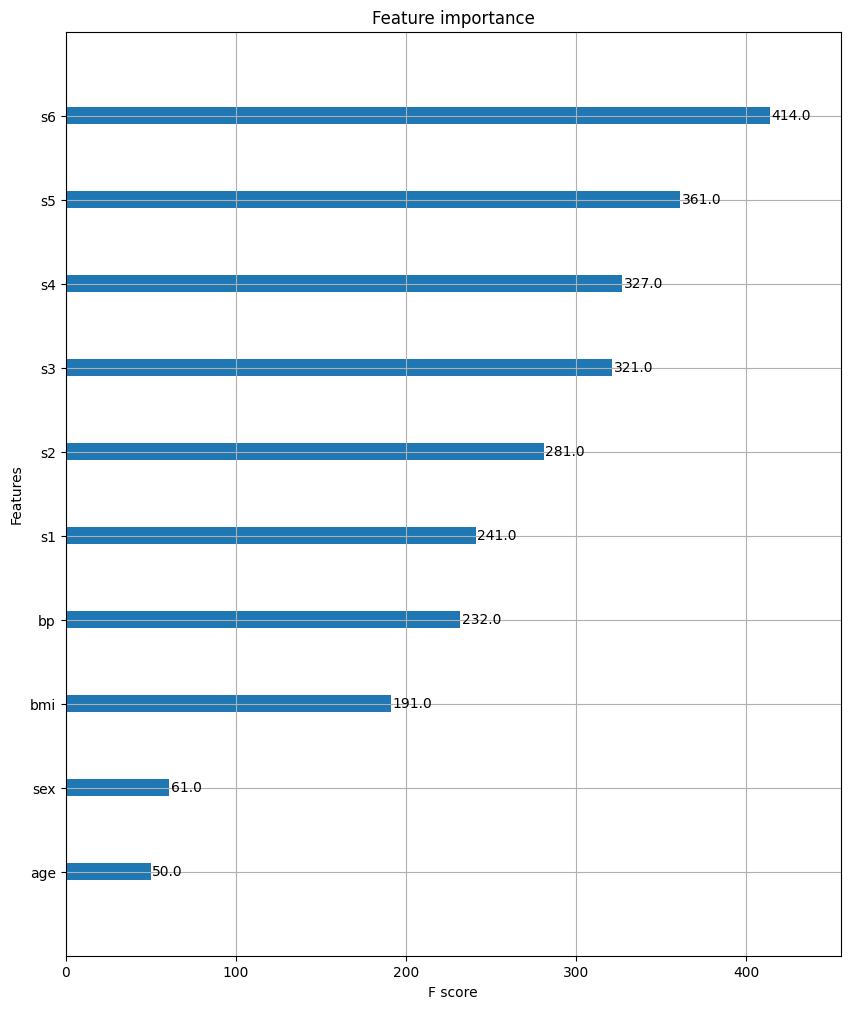

In [56]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgbr, ax=ax)
plt.yticks(range(10), diabetes.feature_names);

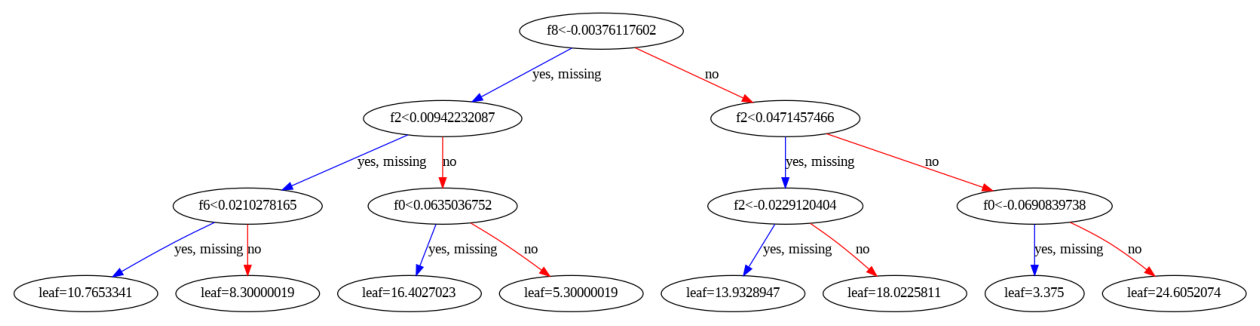

In [57]:
fig, ax = plt.subplots(figsize=(16, 16))
plot_tree(xgbr, ax=ax);

# LightGBM

* 빠른 학습과 예측 시간
* 더 적은 메모리 사용
* 범주형 특징의 자동 변환과 최적 분할

## LGBMClassifier

### 붓꽃 데이터

In [58]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=123)

In [63]:
from lightgbm import LGBMClassifier

lgbmc = LGBMClassifier(n_estimators=400)
evals = [(X_test, y_test)]
lgbmc.fit(X_train, y_train, early_stopping_rounds=100,
          eval_metric="logloss", eval_set=evals)
preds = lgbmc.predict(X_test)

[1]	valid_0's multi_logloss: 0.95847
[2]	valid_0's multi_logloss: 0.832184
[3]	valid_0's multi_logloss: 0.731164
[4]	valid_0's multi_logloss: 0.641056
[5]	valid_0's multi_logloss: 0.571726
[6]	valid_0's multi_logloss: 0.507286
[7]	valid_0's multi_logloss: 0.454933
[8]	valid_0's multi_logloss: 0.410205
[9]	valid_0's multi_logloss: 0.372194
[10]	valid_0's multi_logloss: 0.333919
[11]	valid_0's multi_logloss: 0.310212
[12]	valid_0's multi_logloss: 0.282326
[13]	valid_0's multi_logloss: 0.257165
[14]	valid_0's multi_logloss: 0.240836
[15]	valid_0's multi_logloss: 0.225383
[16]	valid_0's multi_logloss: 0.211583
[17]	valid_0's multi_logloss: 0.199289
[18]	valid_0's multi_logloss: 0.186269
[19]	valid_0's multi_logloss: 0.171556
[20]	valid_0's multi_logloss: 0.168245
[21]	valid_0's multi_logloss: 0.161065
[22]	valid_0's multi_logloss: 0.151371
[23]	valid_0's multi_logloss: 0.148081
[24]	valid_0's multi_logloss: 0.143843
[25]	valid_0's multi_logloss: 0.140169
[26]	valid_0's multi_logloss: 0.138

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


In [64]:
cross_val = cross_validate(
    estimator=lgbmc,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.09908051490783691 (+/- 0.009480715174382991)
avg score time: 0.0024444580078125 (+/- 0.00018563690077918598)
avg test score: 0.9600000000000002 (+/- 0.04898979485566355)


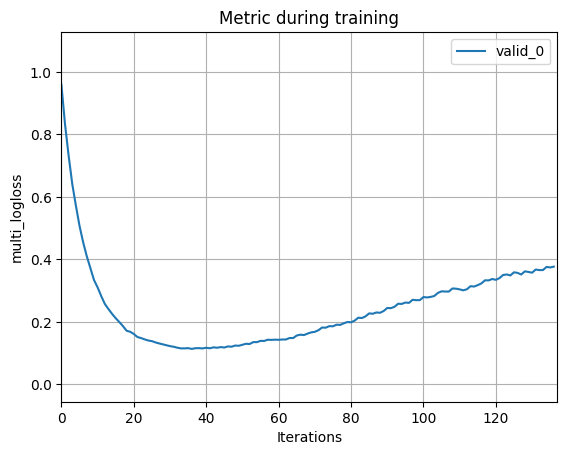

In [65]:
from lightgbm import plot_metric

plot_metric(lgbmc);

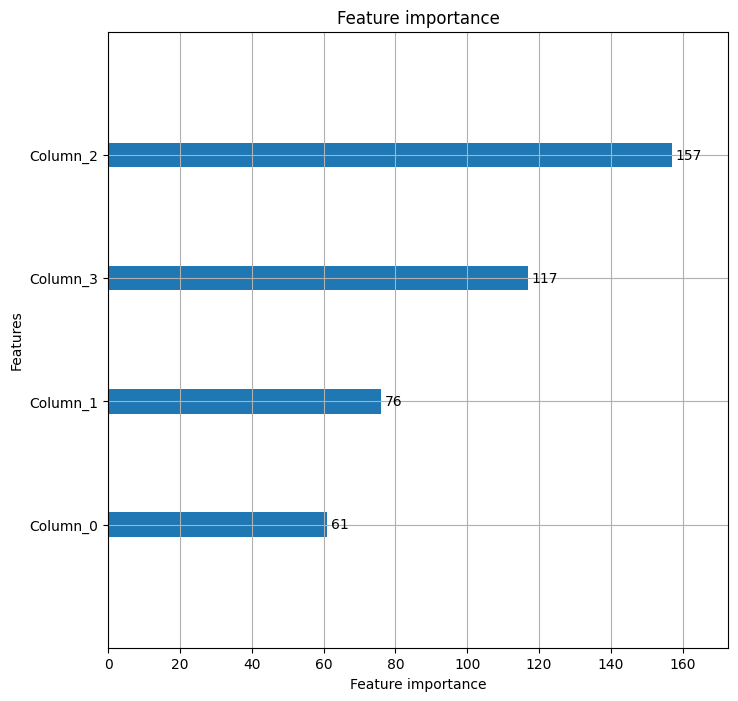

In [72]:
from lightgbm import plot_importance

plot_importance(lgbmc, figsize=(8, 8));

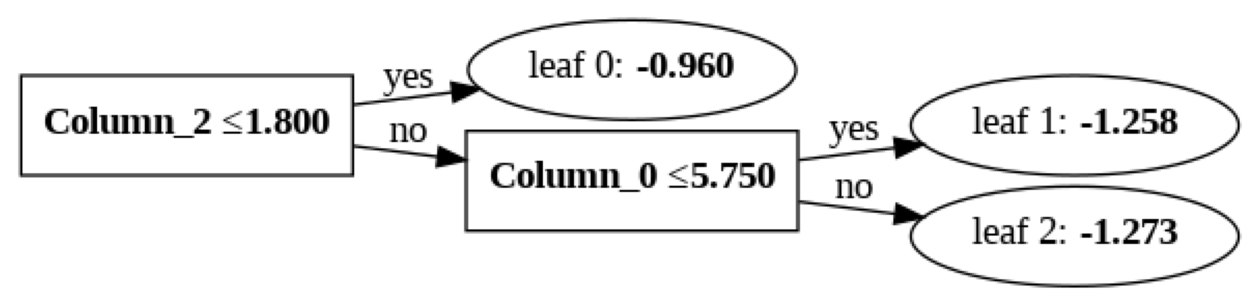

In [70]:
from lightgbm import plot_tree

plot_tree(lgbmc, figsize=(16, 16));

### 와인 데이터

In [ ]:
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=123)

In [ ]:
lgbmc = LGBMClassifier(n_estimators=400)
evals = [(X_test, y_test)]
lgbmc.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
preds = lgbmc.predict(X_test)

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's multi_logloss: 1.05985
[2]	valid_0's multi_logloss: 0.941671
[3]	valid_0's multi_logloss: 0.838354
[4]	valid_0's multi_logloss: 0.761596
[5]	valid_0's multi_logloss: 0.677439
[6]	valid_0's multi_logloss: 0.607711
[7]	valid_0's multi_logloss: 0.556301
[8]	valid_0's multi_logloss: 0.51301
[9]	valid_0's multi_logloss: 0.460772
[10]	valid_0's multi_logloss: 0.418941
[11]	valid_0's multi_logloss: 0.386691
[12]	valid_0's multi_logloss: 0.354477
[13]	valid_0's multi_logloss: 0.325968
[14]	valid_0's multi_logloss: 0.302653
[15]	valid_0's multi_logloss: 0.279562
[16]	valid_0's multi_logloss: 0.258911
[17]	valid_0's multi_logloss: 0.239598
[18]	valid_0's multi_logloss: 0.220811
[19]	valid_0's multi_logloss: 0.203974
[20]	valid_0's multi_logloss: 0.188324
[21]	valid_0's multi_logloss: 0.175522
[22]	valid_0's multi_logloss: 0.162242
[23]	valid_0's multi_logloss: 0.151123
[24]	valid_0's multi_logloss: 0.140635
[25]	valid_0's multi_logloss: 0.132925
[26]	valid_0's multi_logloss: 0.1251

In [ ]:
cross_val = cross_validate(
    estimator=lgbmc,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.08679218292236328 (+/- 0.017634548614940872)
avg score time: 0.002659130096435547 (+/- 0.0013516660146073497)
avg test score: 0.9776190476190475 (+/- 0.01119469694127331)


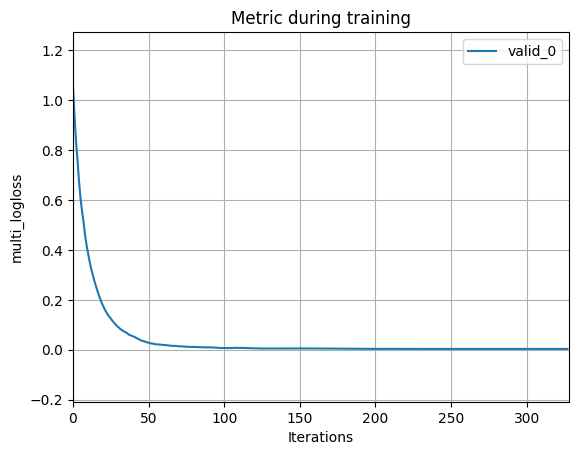

In [ ]:
plot_metric(lgbmc);

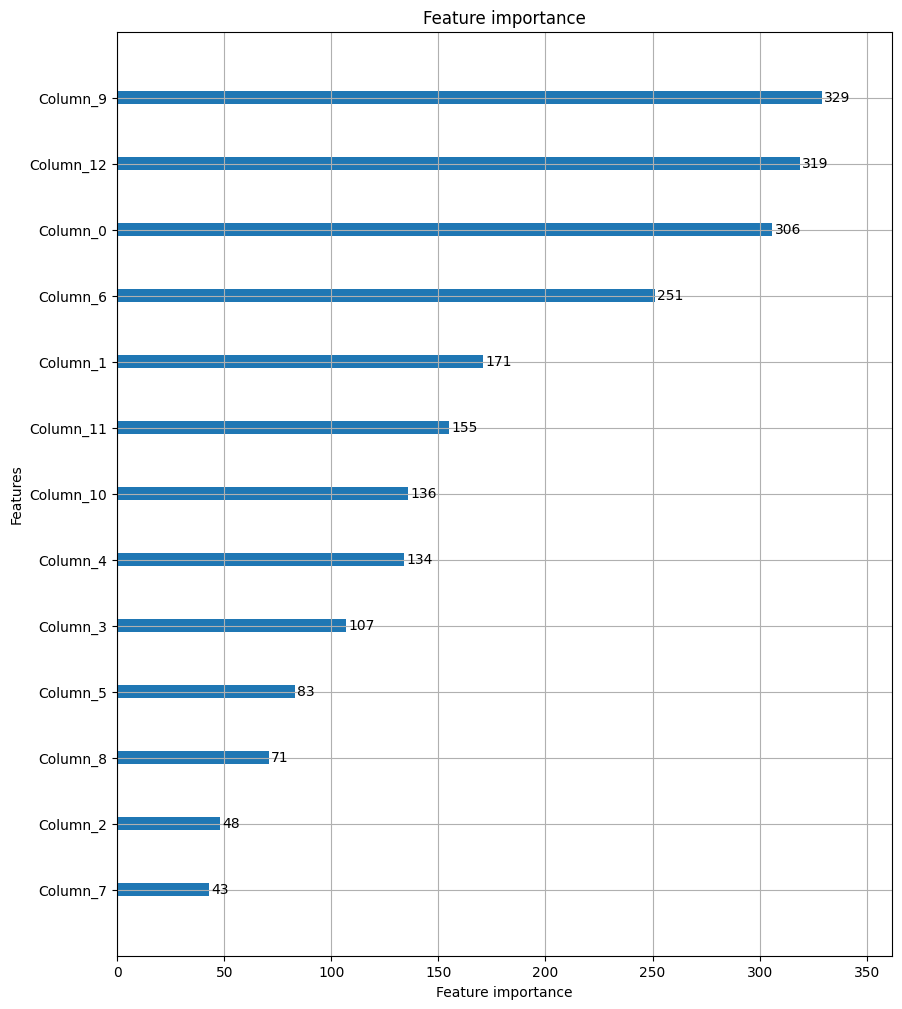

In [ ]:
plot_importance(lgbmc, figsize=(10, 12));

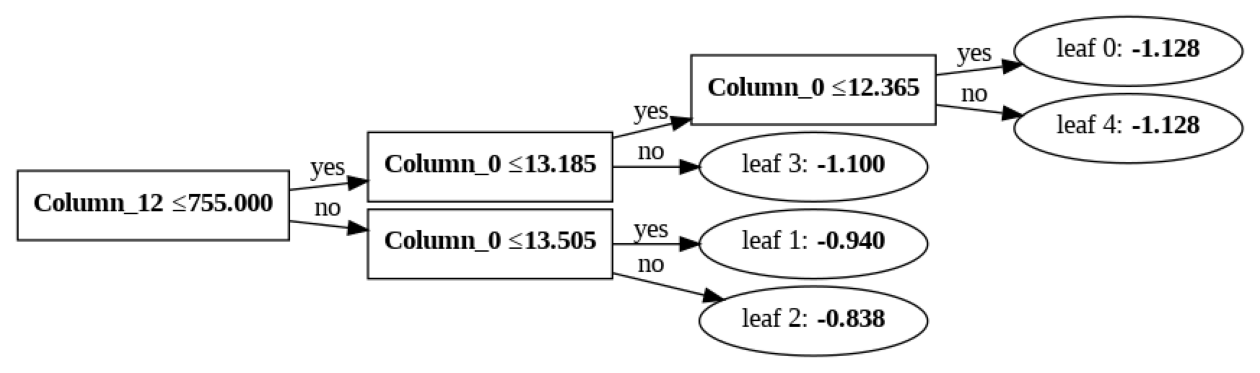

In [ ]:
plot_tree(lgbmc, figsize=(16, 16));

### 유방암 데이터

In [ ]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=123)

In [ ]:
lgbmc = LGBMClassifier(n_estimators=400)
evals = [(X_test, y_test)]
lgbmc.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
preds = lgbmc.predict(X_test)

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's binary_logloss: 0.575665
[2]	valid_0's binary_logloss: 0.513919
[3]	valid_0's binary_logloss: 0.463418
[4]	valid_0's binary_logloss: 0.420506
[5]	valid_0's binary_logloss: 0.383433
[6]	valid_0's binary_logloss: 0.351962
[7]	valid_0's binary_logloss: 0.325134
[8]	valid_0's binary_logloss: 0.301618
[9]	valid_0's binary_logloss: 0.276072
[10]	valid_0's binary_logloss: 0.259487
[11]	valid_0's binary_logloss: 0.244766
[12]	valid_0's binary_logloss: 0.224551
[13]	valid_0's binary_logloss: 0.211222
[14]	valid_0's binary_logloss: 0.197052
[15]	valid_0's binary_logloss: 0.187863
[16]	valid_0's binary_logloss: 0.180071
[17]	valid_0's binary_logloss: 0.172646
[18]	valid_0's binary_logloss: 0.162952
[19]	valid_0's binary_logloss: 0.154079
[20]	valid_0's binary_logloss: 0.146169
[21]	valid_0's binary_logloss: 0.140076
[22]	valid_0's binary_logloss: 0.132763
[23]	valid_0's binary_logloss: 0.127181
[24]	valid_0's binary_logloss: 0.119348
[25]	valid_0's binary_logloss: 0.114732
[26]	vali

In [ ]:
cross_val = cross_validate(
    estimator=lgbmc,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.25980277061462403 (+/- 0.03850445836144295)
avg score time: 0.002940464019775391 (+/- 3.681275509869134e-05)
avg test score: 0.9736531594472908 (+/- 0.015674460437800138)


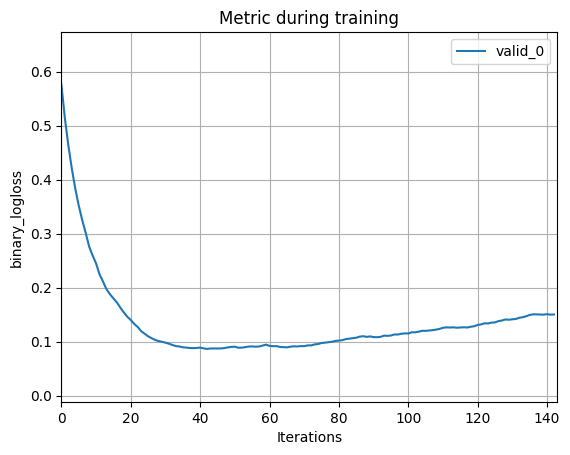

In [ ]:
plot_metric(lgbmc);

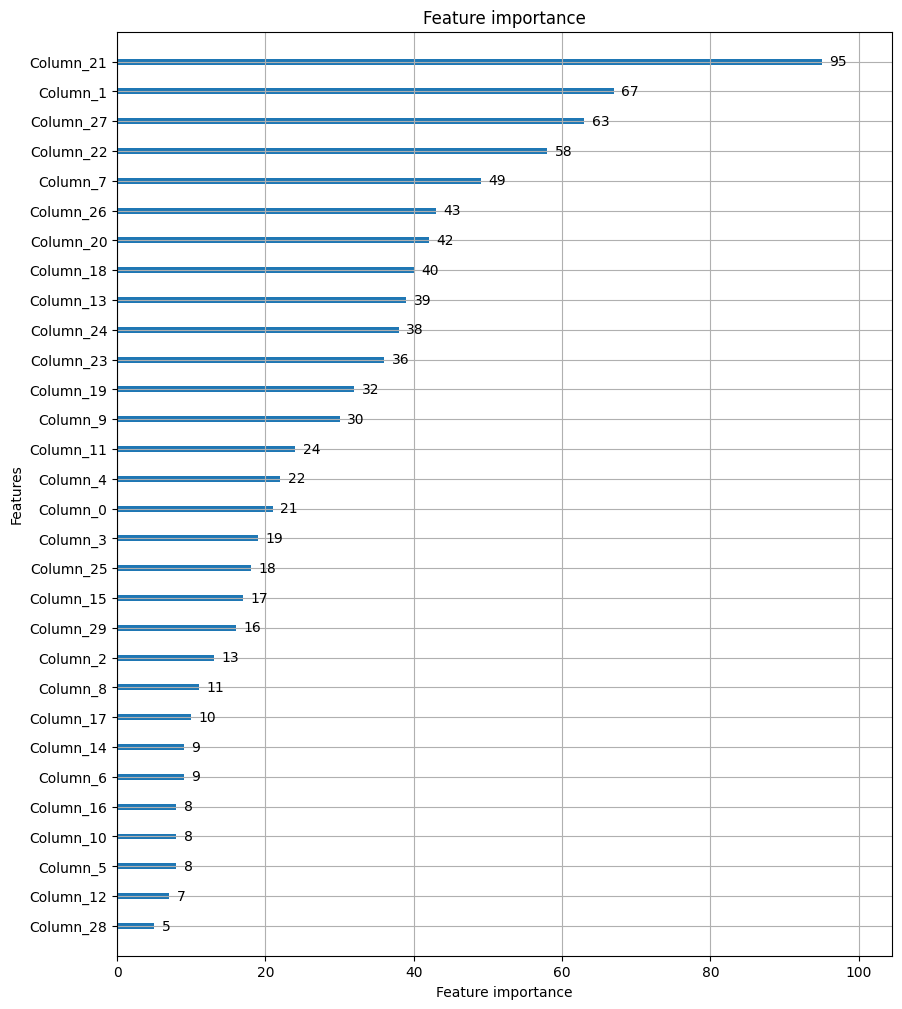

In [ ]:
plot_importance(lgbmc, figsize=(10, 12));

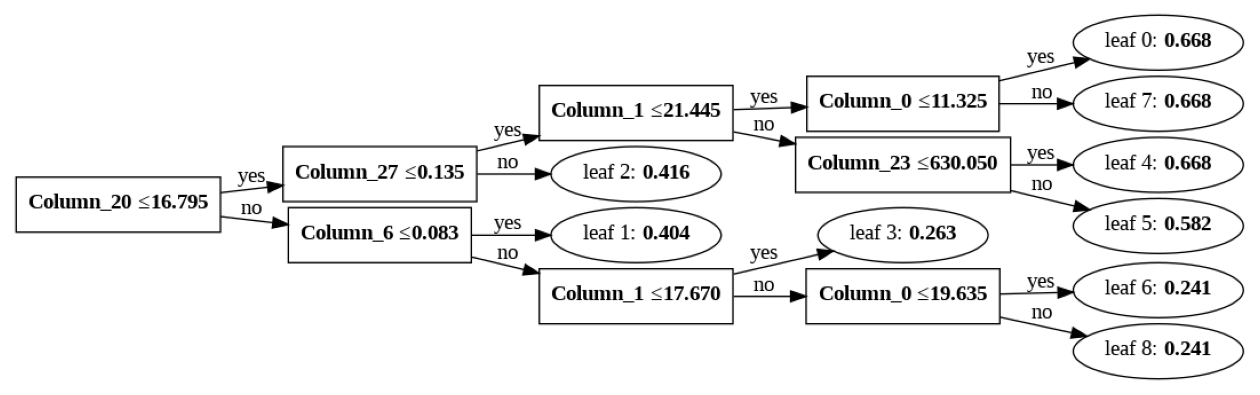

In [ ]:
plot_tree(lgbmc, figsize=(16, 16));

## LGBMRegressor

### 보스턴 데이터

In [ ]:
boston_columns = boston_df.drop('MEDV', axis=1).columns
boston_X = boston_df.drop('MEDV', axis=1).to_numpy()
boston_y = boston_df['MEDV'].to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(boston_X, boston_y, test_size=0.2, random_state=123)

In [ ]:
from lightgbm import LGBMRegressor

lgbmr = LGBMRegressor(n_estimators=400)
evals = [(X_test, y_test)]
lgbmr.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
preds = lgbmr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's l2: 71.4897
[2]	valid_0's l2: 61.8603
[3]	valid_0's l2: 54.0848
[4]	valid_0's l2: 47.9263
[5]	valid_0's l2: 43.0702
[6]	valid_0's l2: 39.268
[7]	valid_0's l2: 36.2667
[8]	valid_0's l2: 33.8931
[9]	valid_0's l2: 31.7028
[10]	valid_0's l2: 30.082
[11]	valid_0's l2: 29.1638
[12]	valid_0's l2: 27.9059
[13]	valid_0's l2: 27.2503
[14]	valid_0's l2: 26.3942
[15]	valid_0's l2: 26.0862
[16]	valid_0's l2: 25.6483
[17]	valid_0's l2: 25.0221
[18]	valid_0's l2: 24.919
[19]	valid_0's l2: 24.5501
[20]	valid_0's l2: 24.2858
[21]	valid_0's l2: 23.9636
[22]	valid_0's l2: 23.8872
[23]	valid_0's l2: 23.676
[24]	valid_0's l2: 23.5907
[25]	valid_0's l2: 23.4353
[26]	valid_0's l2: 23.1653
[27]	valid_0's l2: 23.0198
[28]	valid_0's l2: 22.8605
[29]	valid_0's l2: 22.8311
[30]	valid_0's l2: 22.8943
[31]	valid_0's l2: 22.8056
[32]	valid_0's l2: 22.9915
[33]	valid_0's l2: 22.9286
[34]	valid_0's l2: 23.0395
[35]	valid_0's l2: 22.76
[36]	valid_0's l2: 22.6387
[37]	valid_0's l2: 22.4443
[38]	valid_0's l

In [ ]:
cross_val = cross_validate(
    estimator=lgbmr,
    X=boston_X, y=boston_y,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.20277876853942872 (+/- 0.10903813634783692)
avg score time: 0.003398752212524414 (+/- 0.0002997225038187374)
avg test score: 0.5692468252571979 (+/- 0.2956636613238221)


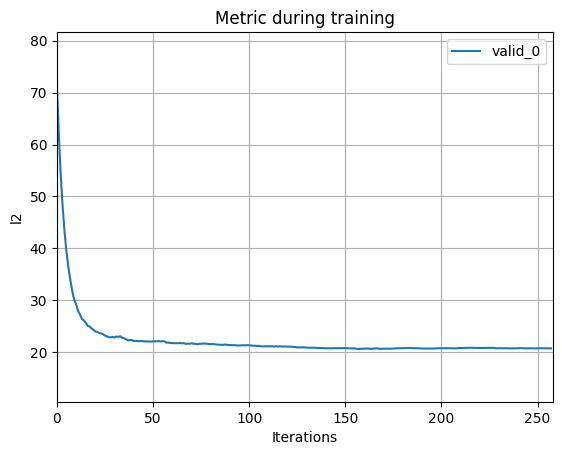

In [ ]:
plot_metric(lgbmr);

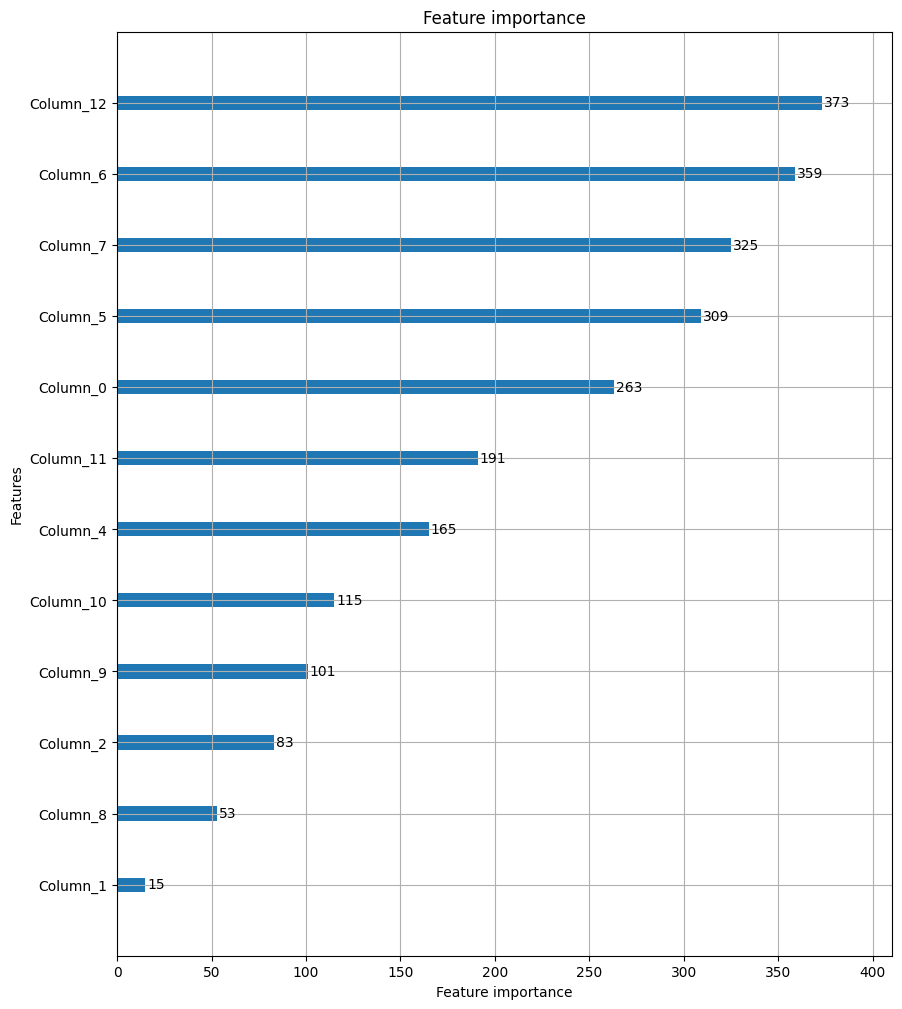

In [ ]:
plot_importance(lgbmr, figsize=(10, 12));

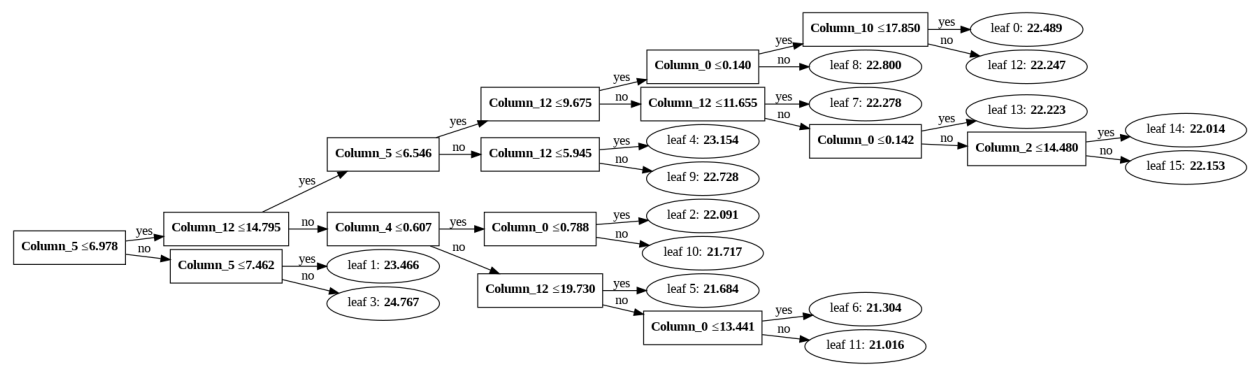

In [ ]:
plot_tree(lgbmr, figsize=(16, 16));

### 당뇨병 데이터

In [ ]:
diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=123)

In [ ]:
lgbmr = LGBMRegressor(n_estimators=400)
evals = [(X_test, y_test)]
lgbmr.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
preds = lgbmr.predict(X_test)

[1]	valid_0's l2: 5692.17
[2]	valid_0's l2: 5218.79
[3]	valid_0's l2: 4835.34
[4]	valid_0's l2: 4479.84
[5]	valid_0's l2: 4183.42
[6]	valid_0's l2: 3924.35
[7]	valid_0's l2: 3726.96
[8]	valid_0's l2: 3555.3
[9]	valid_0's l2: 3407.95
[10]	valid_0's l2: 3291.33
[11]	valid_0's l2: 3201.78
[12]	valid_0's l2: 3114.69
[13]	valid_0's l2: 3059.18
[14]	valid_0's l2: 3008.23
[15]	valid_0's l2: 2947.54
[16]	valid_0's l2: 2878.87
[17]	valid_0's l2: 2825.36
[18]	valid_0's l2: 2793.93
[19]	valid_0's l2: 2789.05
[20]	valid_0's l2: 2747.97
[21]	valid_0's l2: 2726.98
[22]	valid_0's l2: 2708.27
[23]	valid_0's l2: 2688.73
[24]	valid_0's l2: 2666.47
[25]	valid_0's l2: 2663.19
[26]	valid_0's l2: 2639.87
[27]	valid_0's l2: 2618.63
[28]	valid_0's l2: 2645.22
[29]	valid_0's l2: 2629.27
[30]	valid_0's l2: 2619.76
[31]	valid_0's l2: 2606.01
[32]	valid_0's l2: 2598.19
[33]	valid_0's l2: 2560.01
[34]	valid_0's l2: 2576.54
[35]	valid_0's l2: 2585.75
[36]	valid_0's l2: 2577.63
[37]	valid_0's l2: 2567.43
[38]	valid_

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


In [ ]:
cross_val = cross_validate(
    estimator=lgbmr,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.12643780708312988 (+/- 0.025967622234770657)
avg score time: 0.0032349109649658205 (+/- 0.0008216031179261043)
avg test score: 0.30914851068873495 (+/- 0.06993417631703827)


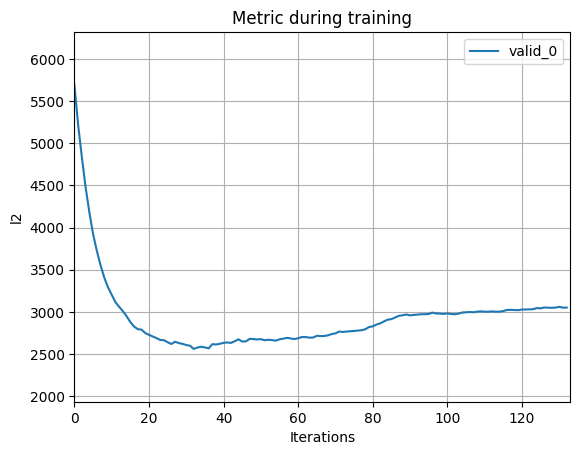

In [ ]:
plot_metric(lgbmr);

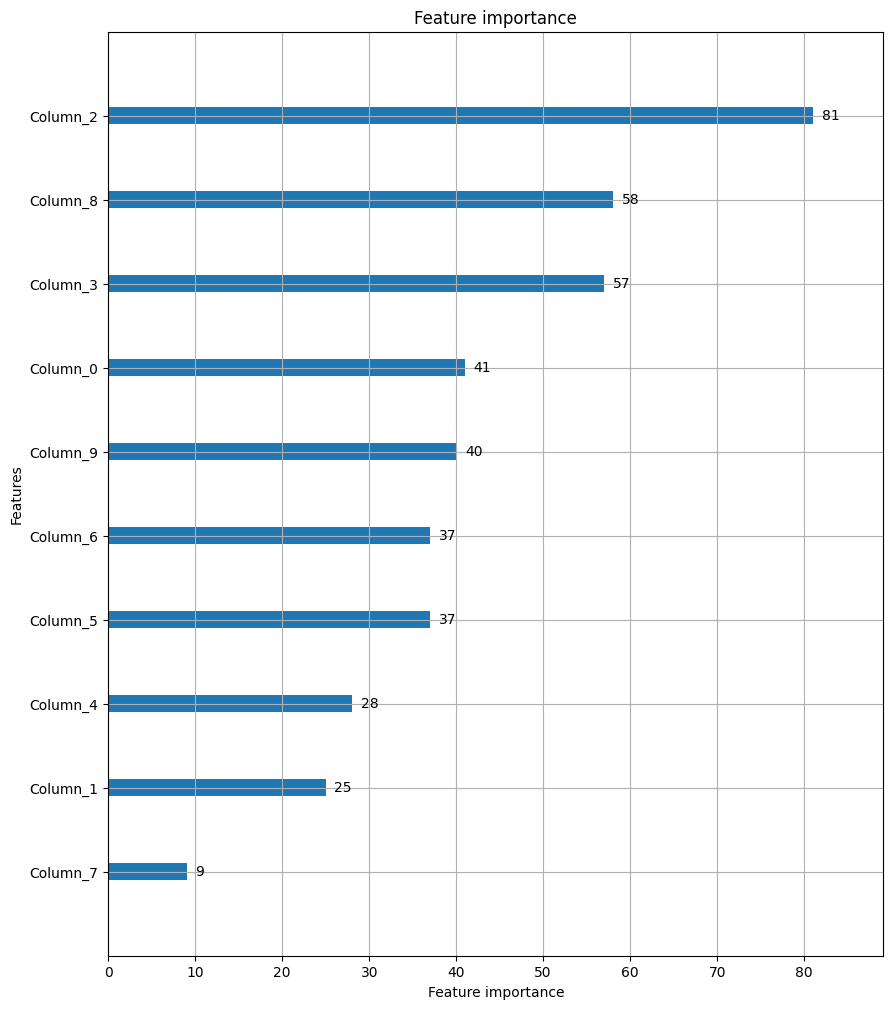

In [ ]:
plot_importance(lgbmr, figsize=(10, 12));

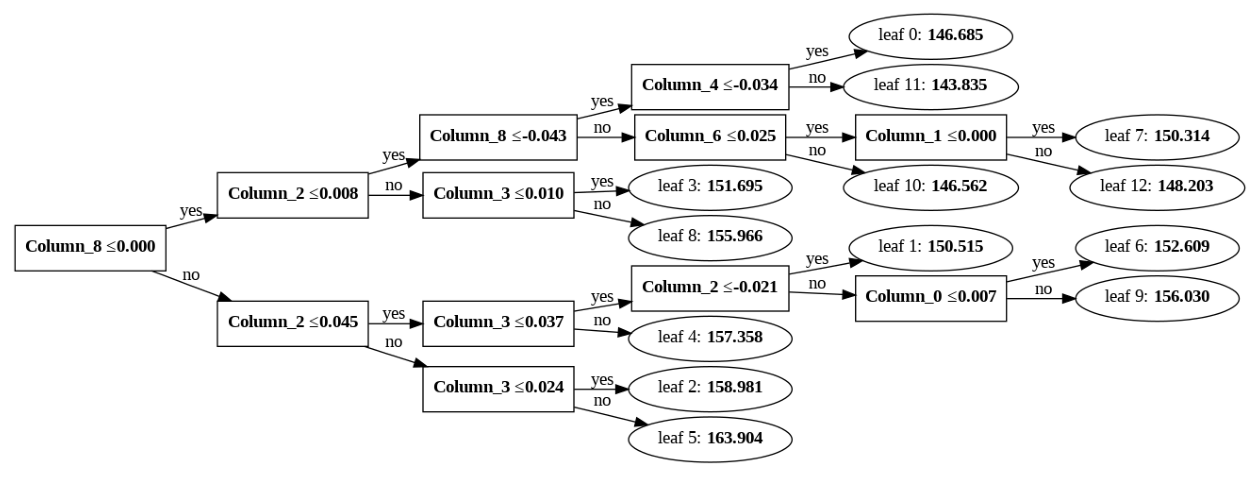

In [ ]:
plot_tree(lgbmr, figsize=(16, 16));